[[  1. 525.]
 [  2. 525.]
 [  3. 524.]
 [  4. 481.]
 [  5. 481.]
 [  6. 484.]
 [  7. 496.]
 [  8. 496.]
 [  9. 496.]
 [ 10. 496.]]
(5747, 2)
Parámetros del modelo fp1: [2.04007441e-01 7.82417608e+02]
Error del modelo fp1: [6.49218912e+08]
Parámetros del modelo fp2: [-3.35351412e-05  3.96767432e-01  5.97721409e+02]
Error del modelo fp2: [6.10050705e+08]
Errores para el conjunto completo de datos:
Error d=1: 649218911.882144
Error d=2: 610050704.660748
Error d=3: 519546159.448046
Error d=10: 180158231.335230
Errores solamente después del punto de inflexión
Error d=1: 99722213.941190
Error d=2: 138801827.816650
Error d=3: 78849443.255083
Error d=10: 31927815.595135
Error de inflexión=567710129.484368
Entrenamiento de datos únicamente despúes del punto de inflexión
Errores después del punto de inflexión
Error d=1: 25042741.995712
Error d=2: 9775570.633563
Error d=3: 9636037.866602
Error d=10: 4042593.670586


C:\Users\HOGAR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


fbt2(x)= 
        2
0.0447 x - 496.3 x + 1.379e+06
fbt2(x)-5,000= 
        2
0.0447 x - 496.3 x + 1.374e+06
Prueba de error para después del punto de inflexión
Error d=1: 7611715.444704
Error d=2: 4080546.136271
Error d=3: 4419362.829595
Error d=10: 1554412.266688


C:\Users\HOGAR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


        2
0.0447 x - 496.3 x + 1.379e+06
        2
0.0447 x - 496.3 x + 1.374e+06

La plata alcanzara el precio de 5,000 pesos por gramo en el Trienio 4.941249

La plata alcanzara el precio de 5,000 pesos por gramo en el Trienio 5.591737


C:\Users\HOGAR\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


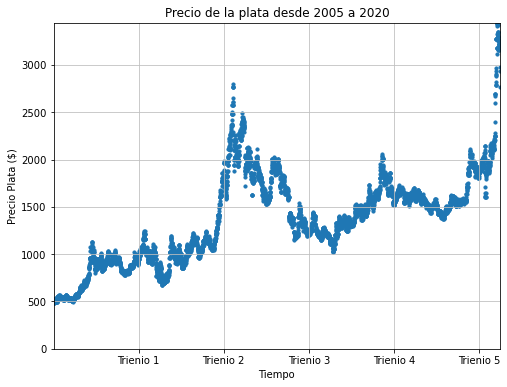

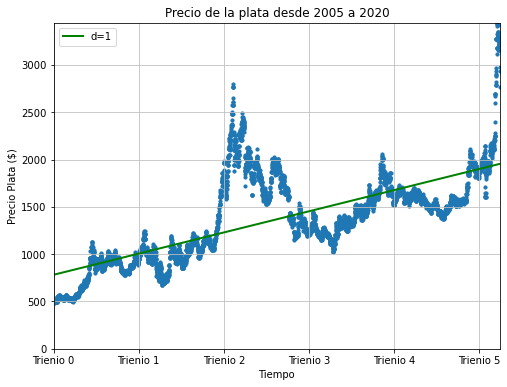

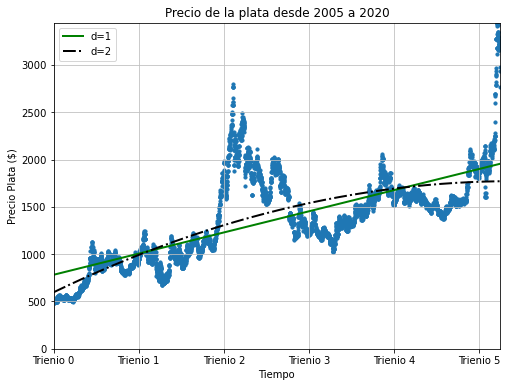

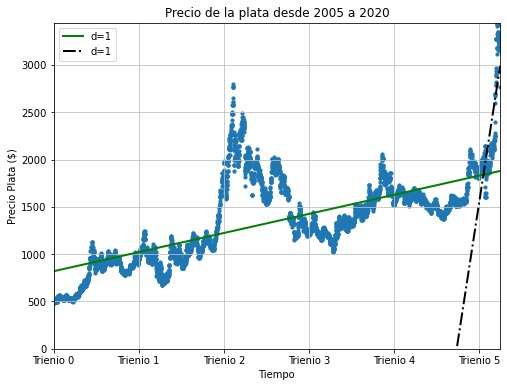

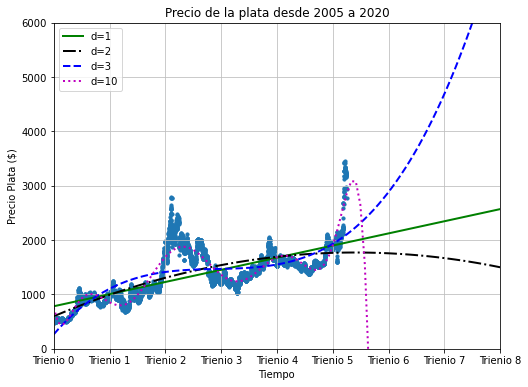

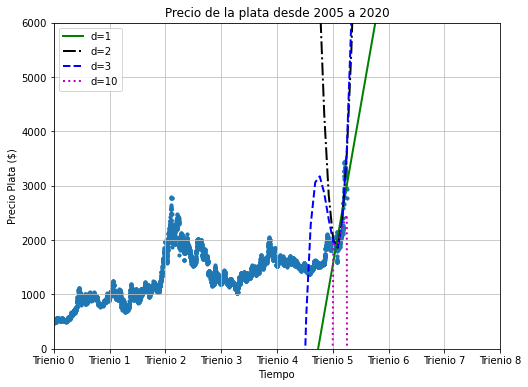

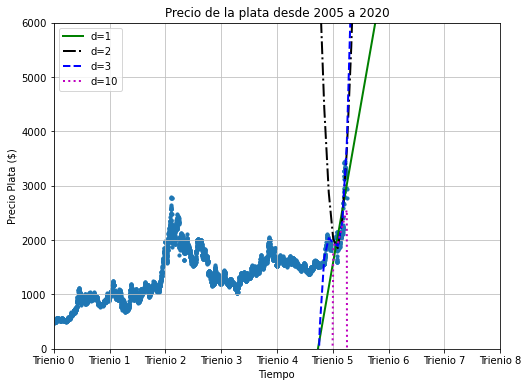

In [33]:
import os
import math
from utils import DATA_DIR, CHART_DIR
import numpy as np

np.seterr(all='ignore')

import scipy as sp
import matplotlib.pyplot as plt

#leer el documento
data = np.genfromtxt(os.path.join(DATA_DIR, "precioplata.tsv"), delimiter="\t")

# Se establece el tipo de dato
data = np.array(data, dtype=np.float64)
print(data[:10])
print(data.shape)


colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']
x = data[:, 0]
y = data[:, 1]



def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    
    ''' dibujar datos de entrada '''
    # Crea una nueva figura, o activa una existente.
    # num = identificador, figsize: anchura, altura
    plt.figure(num=None, figsize=(8, 6))
    
    # Borra el espacio de la figura
    plt.clf()
    
    # Un gráfico de dispersión de y frente a x con diferentes tamaños y colores de marcador (tamaño = 10)
    plt.scatter(x, y, s=10)
    
    # Títulos de la figura
    # Título superior
    plt.title("Precio de la plata desde 2005 a 2020")
    
    # Título en la base
    plt.xlabel("Tiempo")
    
    # Título lateral
    plt.ylabel("Precio Plata ($)")

    # Titulo de la base de X
    plt.xticks(
        [w * 365 * 3 for w in range(10)], 
        ['Trienio %i' % w for w in range(10)])


    if models:
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
    
        for model, style, color in zip(models, linestyles, colors):
            # print "Modelo:",model
            # print "Coeffs:",model.coeffs

            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')                 
    plt.savefig(fname)

#Primera mirada de datos
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))          

#Crea y dibuja los datos
fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)
f1 = sp.poly1d(fp1)
fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)
f3 = sp.poly1d(np.polyfit(x, y, 3))
f10 = sp.poly1d(np.polyfit(x, y, 10))

#Graficar
plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))

#Punto de inflexion para ajustar y dibujar
inflexion = math.floor(5 * 365 * 3)
xa = x[:int(inflexion)]
ya = y[:int(inflexion)]
xb = x[int(inflexion):]
yb = y[int(inflexion):]


#Se grafican 2 lineas rectas
fa = sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))

plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))

#Función de error
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

#Desde las lineas siguientes, se imprimen los errores:
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errores solamente después del punto de inflexión")
for f in [f1, f2, f3, f10]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))



""" Se extrapola de modo que se proyecten una prediccion respuestas en el futuro """
plot_models(x, y, [f1, f2, f3, f10], 
    os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=np.linspace(0 * 365 * 3, 8 * 365 * 3, 100),
    ymax=6000, xmin=0 * 365 * 3)                                    

print("Entrenamiento de datos únicamente despúes del punto de inflexión")
fb1 = fb
fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))

print("Errores después del punto de inflexión")
for f in [fb1, fb2, fb3, fb10]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

# Gráficas después del punto de inflexión
plot_models(
    x, y, [fb1, fb2, fb3, fb10,],
    os.path.join(CHART_DIR, "1400_01_07.png"),
    mx=np.linspace(0 * 365 * 3, 8 * 365 * 3, 100),
    ymax=6000, xmin=0 * 365 * 3)

# Separa el entrenamiento de los datos de prueba
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-5,000= \n%s" % (fbt2-5000))
fbt3 = sp.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))

print("Prueba de error para después del punto de inflexión")
for f in [fbt1, fbt2, fbt3, fbt10]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 365 * 3, 8 * 365 * 3, 100),
    ymax=6000, xmin=0 * 365 * 3)

from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 5000)
alcanzado_max = fsolve(fbt3 - 5000, x0=800) / (365 * 3)
print("\nLa plata alcanzara el precio de 5,000 pesos por gramo en el Trienio %f" % alcanzado_max[0])

alcanzado_max2 = fsolve(fbt1 - 5000, x0=800) / (365 * 3)
print("\nLa plata alcanzara el precio de 5,000 pesos por gramo en el Trienio %f" % alcanzado_max2[0])

